<a href="https://colab.research.google.com/github/lauraAriasFdez/TensorFlowSpecialization/blob/main/CNN_Real_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Allow farmers to nite if the crop has a disease 
1. https://plantvillage.psu.edu/

2. https://www.youtube.com/watch?v=NlpS-DhayQA



# ***ImageGenerator can flow images from a directory***

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale will normalize the image data 
train_datagen = ImageDataGenerator(rescale = 1./255)


#_____________________LOAD TRAINING DATA____________________________ 
""" 
1. this will load images from that directory(train_dir) & SUBdirectory
2. the names of the SUBdirectories will be the labels for the images 
      . images will all be resize to a given target_sizr
      . images will be loaded in batches for training and validation 
"""
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_sizr=(300,300),
                    batch_size = 128,
                    class_mode="binary"
                  ) 

#_____________________LOAD TESTING DATA____________________________ 
validation_generator = train_datagen.flow_from_directory(
                    validation_dir,
                    target_sizr=(300,300),
                    batch_size = 32,
                    class_mode="binary"
                  ) 


# ***Example of ConNet*** 

### ***1. Donwload the dataset***
 (horse-or-human.zip)

In [1]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:01<00:00, 80.1MB/s]


### ***2. Unzip data and Store it in the OS***

In [2]:
import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

### ***3. Explore Data***

In [6]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')
# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')


## Print some image names
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10]) 

# Get the total number of pictures 
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

['horse37-0.png', 'horse24-9.png', 'horse10-3.png', 'horse14-6.png', 'horse36-1.png', 'horse25-9.png', 'horse15-7.png', 'horse45-3.png', 'horse07-2.png', 'horse38-6.png']
['human03-13.png', 'human08-04.png', 'human07-16.png', 'human05-17.png', 'human02-24.png', 'human02-21.png', 'human14-13.png', 'human04-01.png', 'human10-03.png', 'human09-17.png']
total training horse images: 500
total training human images: 527


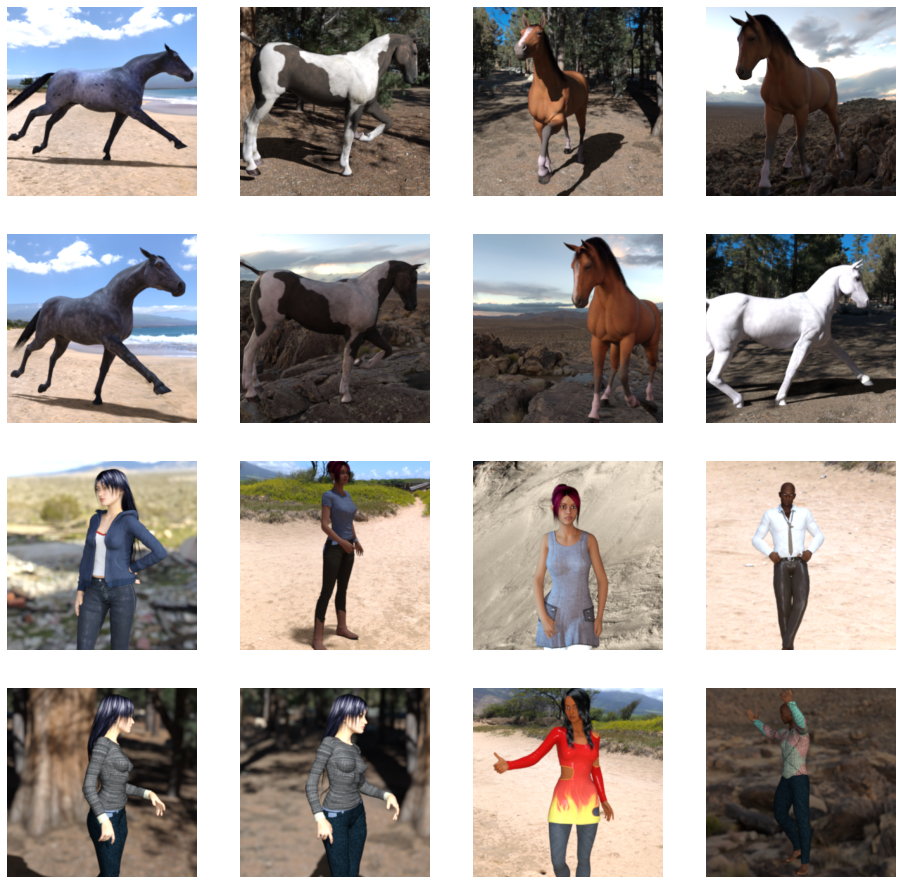

In [8]:
## Let´s display some images 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)


# Index for iterating over images
pic_index = 0
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

###***4. Data Preprocessing***

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.


### ***5. Build Model***

- In this sample: We do not explicitly label the images as horses or humans, so we need to use an **Image Generator**

- **two-class classification problem**: we will end our network with a ***sigmoid activation***, so that the output of our network will be a single scalar between 0 and 1

In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

### ***6. Compile Model***

In [13]:
from tensorflow.keras.optimizers import RMSprop
"""
     using the RMSprop optimization algorithm is preferable to stochastic 
     gradient descent (SGD), because RMSprop automates learning-rate tuning for us.
"""
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc']
              )


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### ***7. Train Model***


In [ ]:
## Train the model  - instead of using a dataset we are using generators
"""
  steps_per_epoch: we know that we have 1024 training images, and we are
                    loading them 128 at the time, so we want 8 batches to load all

  validation_data: the data is actually the validation generator of pictures
  validation_steps: we set in the validation generator to load in batch of 32
                    and we know there are 256 images, so we need 8 times

  verbose: just specifies how much to display WHILE training 
"""
history= model.fit(train_generator,
                    steps_per_epoch=8,
                    epochs=15,
                    verbose=1
                  )



Epoch 1/15
8/8 [==============================] - 69s 8s/step - loss: 0.8568 - acc: 0.5384
Epoch 2/15
8/8 [==============================] - 67s 9s/step - loss: 0.7170 - acc: 0.6885
Epoch 3/15


### ***8. Predictions on Unseen Data***
- Do not use Safari browser for this 

In [ ]:
# Prediction on the model 
import numpy as np
from google.colab import files
from keras.preprocessing import image


# Allows in collab to the user to PICK image to test
uploaded = files.upload()


for fn in uploaded.keys(): # for all the images uploaded 
 
  # Load the image and prepare it to be an imput to the model
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  # Actually pass the image to predict (return an array of classes) - for binary 1 item
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")





### ***9. Visualize Intermediate Representations***
To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# CLEAN UP KERNEL


In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)